In [1]:
import sys
sys.path.insert(0, 'C://Users//Adminn//Downloads')
import random
import math
from glob import glob
from tqdm import tqdm
from pprint import pprint
from time import time
import datetime as dtime
from datetime import datetime
import itertools
import warnings
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels. stats.multicomp import pairwise_tukeyhsd
import json
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data_test.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92061 entries, 0 to 92060
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   platform       92061 non-null  object
 1   campaign_id    92061 non-null  int64 
 2   campaign_name  92061 non-null  object
 3   date           92061 non-null  object
 4   impressions    92061 non-null  int64 
 5   clicks         92061 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.2+ MB


In [4]:
data.date = pd.to_datetime(data.date)

In [8]:
data[data['impressions']>0] # Строк, которые имеют хоть один показ, всего 9500 из 91000. Предлагаю сразу работать только с ними
# пока.

,platform,campaign_id,campaign_name,date,impressions,clicks
0,yandex direct,75993195,Венарус | Фармацевты | Баннеры | База Брефи,2023-04-23,35423,109
1,yandex direct,79820654,Дексонал | Фармацевты | Баннеры | База Брефи,2023-04-23,13654,159
2,yandex direct,82468420,Венарус | Фармацевты | Баннеры | База БФГ,2023-04-23,20100,58
3,yandex direct,82469257,Дексонал | Фармацевты | Баннеры | База БФГ,2023-04-23,3459,31
4,yandex direct,84389757,"ВА036 | Венарус, Венапрокт | Хирурги, проктоло...",2023-04-23,4061,29
...,...,...,...,...,...,...
91922,my target,56531009,diclofenac-akos_mt_cpc_multiformat_base_neurol...,2022-07-31,741,6
91936,my target,58007934,venarus_angiorus_mt_cpc_multiformat_base_pharm...,2022-07-31,962,4
91937,my target,58008074,venarus_angiorus_mt_cpc_multiformat_base_pharm...,2022-07-31,175,1
91938,my target,58008562,venarus_angiorus_mt_cpm_carousel_base_pharmacy...,2022-07-31,21167,27


In [9]:
data = data[data['impressions']>0]

In [10]:
data[data['campaign_name']=='Дексонал | Фармацевты | Баннеры | База Брефи'].sort_values(by='date')

,platform,campaign_id,campaign_name,date,impressions,clicks
10501,yandex direct,79820654,Дексонал | Фармацевты | Баннеры | База Брефи,2023-01-03,8307,41
12312,yandex direct,79820654,Дексонал | Фармацевты | Баннеры | База Брефи,2023-01-04,16549,117
13969,yandex direct,79820654,Дексонал | Фармацевты | Баннеры | База Брефи,2023-01-05,12160,71
15602,yandex direct,79820654,Дексонал | Фармацевты | Баннеры | База Брефи,2023-01-06,2572,29
17088,yandex direct,79820654,Дексонал | Фармацевты | Баннеры | База Брефи,2023-01-07,30750,163
...,...,...,...,...,...,...
55218,yandex direct,79820654,Дексонал | Фармацевты | Баннеры | База Брефи,2023-07-22,30634,175
56842,yandex direct,79820654,Дексонал | Фармацевты | Баннеры | База Брефи,2023-07-23,36650,280
58608,yandex direct,79820654,Дексонал | Фармацевты | Баннеры | База Брефи,2023-07-24,60323,289
59909,yandex direct,79820654,Дексонал | Фармацевты | Баннеры | База Брефи,2023-07-25,27464,219


In [11]:
data.platform.value_counts() # Две платформы, я так понимаю это с которых собирались данные. Сразу вопрос, в campaign_name
# есть обозначения "База Брефи", "База ФРГ", либо они отсутствуют. Как мы можем взаимодействовать с этой информацией?
# Необходимо ли нам обособлять их, выделять и делать на ставку на каких-то конкретных?

my target        4957
yandex direct    4544
Name: platform, dtype: int64

In [13]:
data.campaign_name.nunique() # Я пока не считал, сколько именно там разных лекарств, но ясны две вещи:
# - Данные абсолютно не причесаны, есть одни и те же значения на русском и англ, надо будет обработать
# - Лекарств так или иначе больше тех семи, что указаны в таблице.

249

In [27]:
data.sort_values(by='date').impressions.nsmallest(250) #Мне не нравится, что в данных есть куча строк с малым количестом показов
# Нужно будет подумать о том, чтобы обрубить их по какому-то порогу, хотя бы ~10-20, либо взять только те, где есть хоть 1 клик

61396     1
42273     1
42264     1
46064     1
46060     1
         ..
17951    24
2779     24
2778     24
36726    25
87542    25
Name: impressions, Length: 250, dtype: int64

In [34]:
data['click_rate'] = data.clicks/data.impressions

<AxesSubplot:xlabel='date', ylabel='click_rate'>

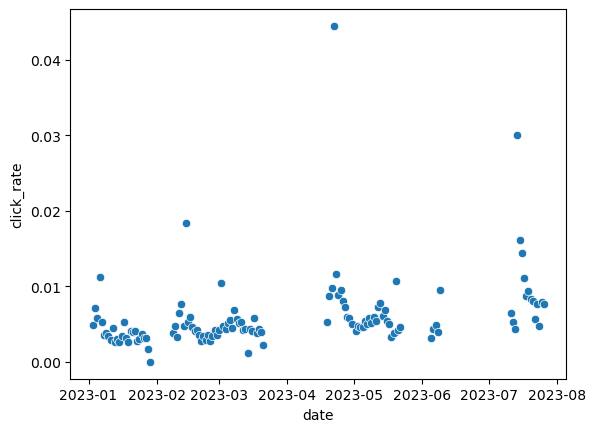

In [35]:
sns.scatterplot(data=data[data['campaign_name']=='Дексонал | Фармацевты | Баннеры | База Брефи'].sort_values(by='date'), x ='date',y='click_rate')
# График клик рейта с течением времени честно говоря выглядит странно. У меня пока нет гипотез объяснить такое распределение,
# поэтому на qa я обязательно собираюсь спросить про то, как данные вообще показываются, как на данный момент выбираются те
# лекарства, которые будут показываться на этой неделе. 

<AxesSubplot:xlabel='date', ylabel='impressions'>

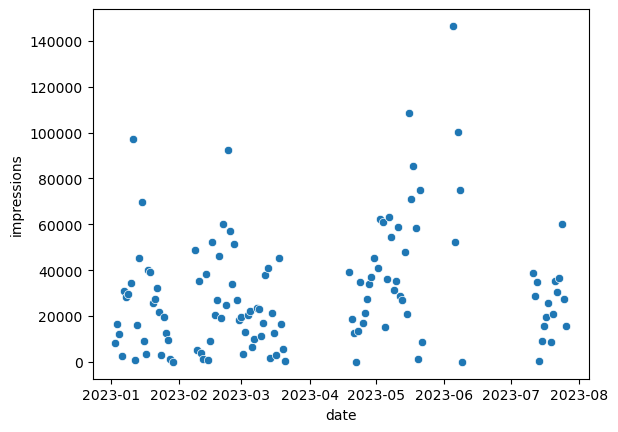

In [23]:
sns.scatterplot(data=data[data['campaign_name']=='Дексонал | Фармацевты | Баннеры | База Брефи'].sort_values(by='date'), x ='date',y='impressions')

In [42]:
top_camp = data.groupby('campaign_name').impressions.sum().sort_values().head(14).index
data_red = data[data.campaign_name.isin(top_camp)]

In [37]:
#data_red.groupby('campaign_name',as_index=False).apply(lambda x: (x['clicks'] / x['impressions']).sum()).rename({None : 'click_rate'},axis=1).sort_values(by='click_rate',ascending = False).head(20)

In [39]:
#data_red[data_red['campaign_name']=='dexonal | carousel | base_pharmacy_bfg'].impressions.sum()

In [40]:
data.groupby('campaign_name').clicks.sum().sort_values()

campaign_name
kagocel_kipferon | squarevideo | base_pediatricians_bfg                            0
КЯ029 | Необутин, Максилак | Педиатры | Баннеры gif | База БФГ                     0
ВА027 | Биннофарм_Венарус, Дексонал | Хирурги | Баннер на памятку | с 14.12        0
kagocel_kipferon | carousel | base_pediatricians_bfg                               0
КЯ029 | Необутин, Максилак | Педиатры | Баннеры gif | База Breffi                  0
                                                                               ...  
Венарус | Фармацевты | База Брефи                                               5623
Дексонал | Фармацевты | База Брефи                                              6942
Венарус | Фармацевты | Баннеры | База Брефи                                     7330
Дексонал | Фармацевты | Баннеры | База БФГ                                      7532
Дексонал | Фармацевты | Баннеры | База Брефи                                   18079
Name: clicks, Length: 249, dtype: int64

In [43]:
data_red

,platform,campaign_id,campaign_name,date,impressions,clicks,click_rate
1311,yandex direct,81657672,"ВА027 | Биннофарм_Венарус, Дексонал | Хирурги ...",2022-12-22,7,0,0.000000
20681,yandex direct,80017980,Дексонал | Хирурги | Доп видео,2022-11-22,39,0,0.000000
22482,yandex direct,80017980,Дексонал | Хирурги | Доп видео,2022-11-23,56,0,0.000000
24179,yandex direct,80017980,Дексонал | Хирурги | Доп видео,2022-11-24,48,0,0.000000
26140,yandex direct,80017980,Дексонал | Хирурги | Доп видео,2022-11-25,24,0,0.000000
...,...,...,...,...,...,...,...
65402,yandex direct,80017980,Дексонал | Хирурги | Доп видео,2022-11-04,128,0,0.000000
65719,yandex direct,80017980,Дексонал | Хирурги | Доп видео,2022-11-05,132,0,0.000000
65882,yandex direct,80017980,Дексонал | Хирурги | Доп видео,2022-11-06,108,0,0.000000
87547,my target,72850704,elmucin | video | base_pharmacy_brefi,2023-03-01,1205,2,0.001660


In [46]:
data.groupby('campaign_name').impressions.sum().sort_values(ascending=False).head(20)

campaign_name
Дексонал | Фармацевты | Баннеры | База Брефи                     3740032
Венарус | Фармацевты | Баннеры | База Брефи                      3414255
Диклофенак-Акос | Фармацевты | Баннеры | База Брефи              2147941
Венарус | Фармацевты | База Брефи                                2005968
Венарус | Фармацевты | Баннеры | База БФГ                        1727102
Дексонал | Фармацевты | База Брефи                               1595350
Кагоцел | Фармацевты | Баннеры | База Брефи                      1280233
venarus_mt_cpm_gorizontalvideo_base_pharma                       1277689
Дексонал | Фармацевты | Баннеры | База БФГ                       1277265
venarus | gorizontalvideo | base_pharmacy_brefi                  1262832
kagocel | mt_cpm_multiformat_base_pharmacy | с 03.01             1222720
Диклофенак-Акос | Фармацевты | Баннеры | База БФГ                1132458
Диклофенак-Акос | Фармацевты | База Брефи                         944159
Дексонал  | Терапевты | Баннеры | Баз